<a href="https://colab.research.google.com/github/itshimanshu2602/Sales_pred_EDA/blob/main/Black_Friday_Sales_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Black Friday Sales
# dataset: https://www.kaggle.com/datasets/sdolezel/black-friday
# Problem Statement

# A retail company “ABC Private Limited” wants to understand the customer purchase behaviour
#  (specifically, purchase amount) against various products of different categories.
#  They have shared purchase summary of various customers for selected high volume products from last month.
#  The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city),
#  product details (product_id and product category) and Total purchase_amount from last month.

# Now, they want to build a model to predict the purchase amount of customer against various products
# which will help them to create personalized offer for customers against different products.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#import dataset
df_train = pd.read_csv("train.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# import test data
df_test = pd.read_csv("test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
#Merge both the data
df = df_train.append(df_test)
df.head()

<ipython-input-5-c0fab41142c5>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527230 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     527230 non-null  int64  
 1   Product_ID                  527230 non-null  object 
 2   Gender                      527230 non-null  object 
 3   Age                         527230 non-null  object 
 4   Occupation                  527230 non-null  int64  
 5   City_Category               527230 non-null  object 
 6   Stay_In_Current_City_Years  527230 non-null  object 
 7   Marital_Status              527230 non-null  int64  
 8   Product_Category_1          527230 non-null  int64  
 9   Product_Category_2          363942 non-null  float64
 10  Product_Category_3          161066 non-null  float64
 11  Purchase                    293631 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 52.3+ MB


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.272300e+05,527230.000000,527230.000000,527230.000000,363942.000000,161066.000000,293631.000000
mean,1.002974e+06,8.079265,0.410195,5.286224,9.847272,12.664156,9319.203837
std,1.724725e+03,6.522483,0.491869,3.740505,5.090152,4.126796,4971.374562
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,11.000000
25%,1.001466e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.002983e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8059.000000
75%,1.004425e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12060.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [8]:
df.drop(['User_ID'], axis = 1, inplace = True)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [9]:
pd.get_dummies(df['Gender'], drop_first = 1)

,M
0,0
1,0
2,0
3,0
4,1
...,...
233594,0
233595,0
233596,0
233597,0


In [10]:
#Categorical gender
df['Gender'] = df['Gender'].map({'F': 0, 'M' : 1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [11]:
# Age category
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [25]:
# pd.get_dummies(df['Age'], drop_first = True)

,18-25,26-,26-35,36-45,46-50,51-55,55+
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
25500,0,0,1,0,0,0,0
25501,0,0,1,0,0,0,0
25502,0,0,1,0,0,0,0
25503,0,0,1,0,0,0,0


In [12]:
df['Age'] = df['Age'].map({'0-17': 1, '18-25' : 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+': 7})

In [13]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Age'] = label_encoder.fit_transform(df['Age'])
df['Age'].unique()
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
df_city = pd.get_dummies(df['City_Category'], drop_first = True)

In [15]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [16]:
pd.concat([df, df_city], axis = 1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0


In [17]:
df.drop('City_Category', axis = 1, inplace = True)

In [18]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6,16,4+,0,8,NaN,NaN,7969.0


In [19]:
# Missing values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            163288
Product_Category_3            366164
Purchase                      233599
dtype: int64

In [20]:
# Replace missing values
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9])

In [21]:
df['Product_Category_2'].value_counts()

8.0     61728
14.0    53492
2.0     47707
16.0    41791
15.0    36572
5.0     25075
4.0     24928
6.0     15938
11.0    13735
17.0    12944
13.0    10211
9.0      5532
12.0     5258
10.0     2927
3.0      2793
18.0     2743
7.0       568
Name: Product_Category_2, dtype: int64

In [22]:
#Replace missing value with mode
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df['Product_Category_2'].isnull().sum()

0

In [23]:
#Replace missing in product category 3
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [24]:
df['Product_Category_3'].isnull().sum()

366164

In [25]:
df['Product_Category_3'].value_counts()

16.0    31381
15.0    26960
14.0    17809
17.0    16234
5.0     16109
8.0     12120
9.0     11272
12.0     8902
13.0     5275
6.0      4638
18.0     4450
4.0      1832
11.0     1773
10.0     1703
3.0       608
Name: Product_Category_3, dtype: int64

In [26]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])
df['Product_Category_3'].isnull().sum()

0

In [27]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0
4,P00285442,1,6,16,4+,0,8,8.0,16.0,7969.0


In [28]:
df.shape

(527230, 10)

In [29]:
df_train.shape

(293631, 12)

In [30]:
df_test.shape

(233599, 11)

In [49]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '')

<ipython-input-49-ec94367881b2>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '')


In [50]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0
4,P00285442,1,6,16,4,0,8,8.0,16.0,7969.0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527230 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  527230 non-null  object 
 1   Gender                      527230 non-null  int64  
 2   Age                         527230 non-null  int64  
 3   Occupation                  527230 non-null  int64  
 4   Stay_In_Current_City_Years  527230 non-null  object 
 5   Marital_Status              527230 non-null  int64  
 6   Product_Category_1          527230 non-null  int64  
 7   Product_Category_2          527230 non-null  float64
 8   Product_Category_3          527230 non-null  float64
 9   Purchase                    293631 non-null  float64
dtypes: float64(3), int64(5), object(2)
memory usage: 44.2+ MB


In [52]:
#Convert data types
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527230 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  527230 non-null  object 
 1   Gender                      527230 non-null  int64  
 2   Age                         527230 non-null  int64  
 3   Occupation                  527230 non-null  int64  
 4   Stay_In_Current_City_Years  527230 non-null  int64  
 5   Marital_Status              527230 non-null  int64  
 6   Product_Category_1          527230 non-null  int64  
 7   Product_Category_2          527230 non-null  float64
 8   Product_Category_3          527230 non-null  float64
 9   Purchase                    293631 non-null  float64
dtypes: float64(3), int64(6), object(1)
memory usage: 44.2+ MB


<Axes: xlabel='Age', ylabel='Purchase'>

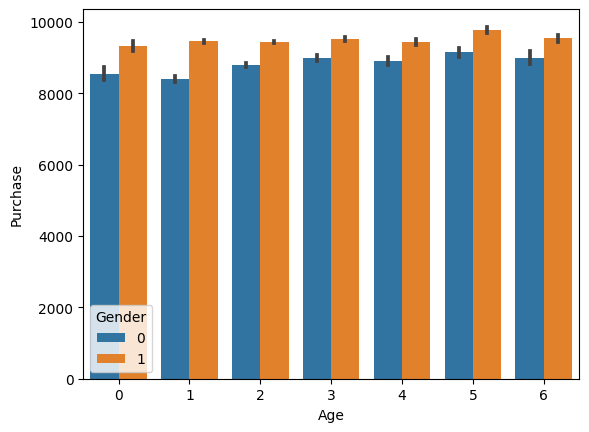

In [59]:
#Visualisation age vs purchase
sns.barplot(y = 'Purchase', x = 'Age', hue = 'Gender', data = df)

<Axes: xlabel='Occupation', ylabel='Purchase'>

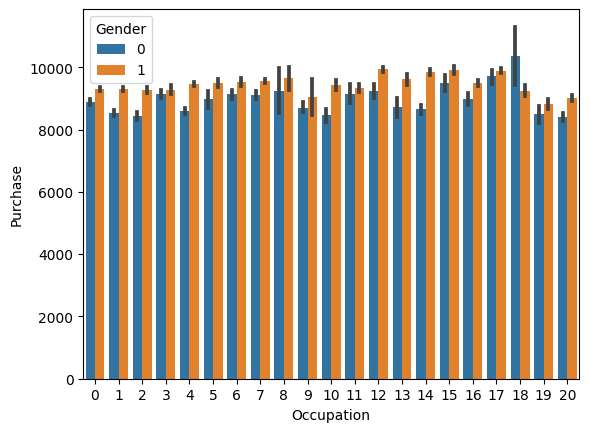

In [60]:
#Purchase vs Occupation
sns.barplot(y = 'Purchase', x = 'Occupation', hue = 'Gender', data = df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

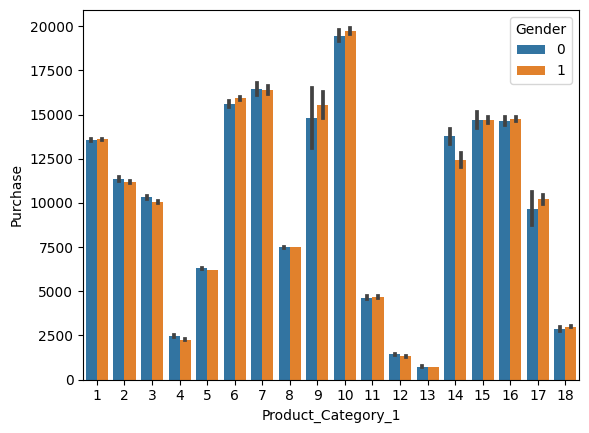

In [62]:
sns.barplot(y = 'Purchase', x = 'Product_Category_1', hue = 'Gender', data = df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

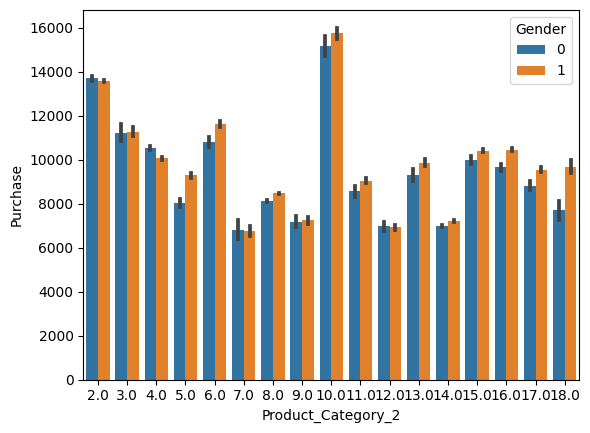

In [63]:
sns.barplot(y = 'Purchase', x = 'Product_Category_2', hue = 'Gender', data = df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

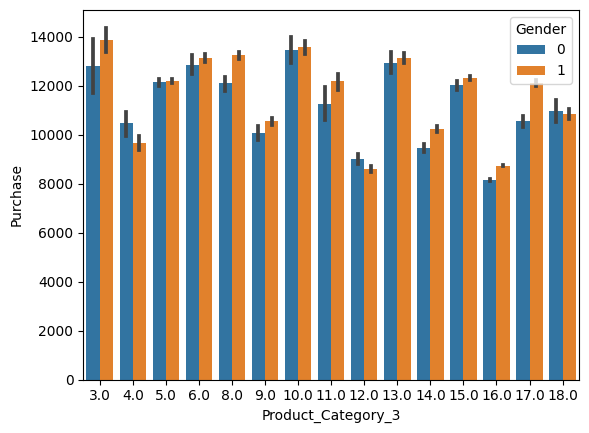

In [64]:
sns.barplot(y = 'Purchase', x = 'Product_Category_3', hue = 'Gender', data = df)

In [65]:
# Feature Scaling
df_test = df[df['Purchase'].isnull()]


In [66]:
df_train = df[~df['Purchase'].isnull()]

In [71]:
X = df_train.drop('Purchase', axis = 1)

In [72]:
y = df_train['Purchase']

In [73]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [74]:
X_train.drop('Product_ID',axis = 1, inplace=True)

In [78]:
X_test.drop('Product_ID',axis = 1, inplace=True)

NameError: ignored

In [77]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

NameError: ignored